# Code

In [ ]:
!pip install midiutil
!pip install pygame
!pip install pretty_midi
!pip install seaborn

In [1]:
import sonify
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from midiutil import MIDIFile
import seaborn as sns

pygame 2.0.1 (SDL 2.0.14, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
data = pd.read_csv("data/plasticc_train_lightcurves.csv.gz") 
dataMETA = pd.read_csv("data/plasticc_train_metadata.csv.gz")

In [3]:
def plotObject(objectID, x0=None, x1=None, y0=None, y1=None):
    plt.figure(figsize=(10, 3))
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")

    objData = data["object_id"].isin([objectID])
    obj = data[objData]
    time = obj["mjd"]
    flux = obj["flux"]

    plt.plot(time, flux, 'o', color = "black")
    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)

In [4]:
def multiPlotObject(objectID,x=None,x0=None, x1=None, y0=None, y1=None):
    plt.figure(figsize=(10, 5))
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")
    plt.title("object: "+str(objectID))

    ugrizy = ['u','g','r','i','z','y']
    newColorsL = ['#cc78bc','#0173b2','#029e73','#ece133','#de8f05','#d55e00']
    sns.set_palette(newColorsL)


    objData = data["object_id"].isin([objectID])
    obj = data[objData]

    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        fluxP = objP["flux"]
        fErr = objP["flux_err"]
        
        plt.errorbar(timeP,fluxP,yerr = fErr,fmt ='o', capsize=0, label = ugrizy[i])
        plt.legend(title= "Passband Legend",bbox_to_anchor=(1.2,1))
    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)

    if not (x is None):
        y0,y1 = plt.ylim()
        x0,x1 = plt.xlim()
    
        plt.plot([x,x+20],[y1,y1],"k",alpha=0.5,lw=3)
        plt.savefig("plotFigures/test%d.png"%(int(x)), bbox_inches='tight')


In [5]:
def sonification(objectID):

    FEObj = pd.DataFrame()
    
    objData = data["object_id"].isin([objectID])
    obj = data[objData]
    time = obj["mjd"]
    flux = obj["flux"]


    x_points = time
    y_points = flux
    low_note=20
    high_note=100
    normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
    normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
            
    normed_data = list(zip(normalized_x, normalized_y))
    FEObj = obj
    sonify.play_midi_from_data(normed_data, track_type='single', key='c_major',df=FEObj)



In [16]:
def multiSonification(objectID):
    multiData = []

    FEObj = pd.DataFrame()
    objData = data["object_id"].isin([objectID])
    obj = data[objData]
    
    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        fluxP = objP["flux"]
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=30)
        scaled_y = sonify.scale_list_to_range(fluxP, new_min=0, new_max=30)
        quantized_x = sonify.quantize_x_value(scaled_x)
        
        multiData.append(list(zip(quantized_x, scaled_y)))
    
    instruments_to_add = [
    'steel drums', 'rock organ', 'pizzicato strings', 'oboe', 'ocarina','violin'
    ]
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    

    FEObj = obj
    
    sonify.play_midi_from_data(multiDataWIntsruments, track_type='multiple', key='c_major', df=FEObj)
    #return FEObj

# Plots and Sonification

In [ ]:
plotObject(5515915)

In [ ]:
sonification(5515915)

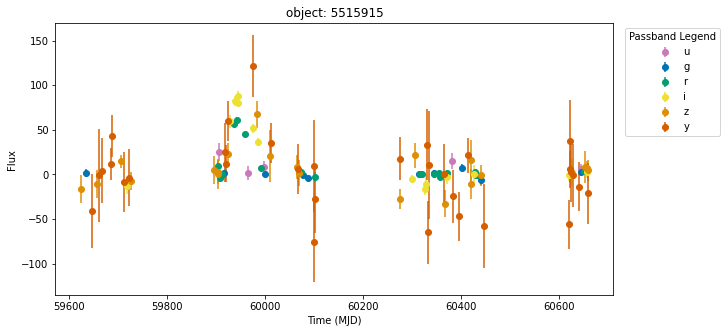

In [22]:
multiPlotObject(5515915)

In [ ]:
multiSonification(5515915)

----

In [ ]:
plotObject(287556)

In [ ]:
sonification(287556)

In [ ]:
multiPlotObject(287556)

In [ ]:
multiSonification(287556)

In [ ]:
multiPlotObject(615)

In [ ]:
for i in range(59800,60600,50):
    multiPlotObject(615, x=i)

In [11]:
multiSonification(615)

Done playing!


In [17]:
test = multiSonification(5515915)